In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
# simplified 2d Example (real embeddings have hundreds of dimensions)
word_embeddings = {
    'cat':[0.8,0.6],
    'kitten':[0.75,0.65],
    'dog':[0.7,0.3],
    'puppy':[0.65,0.35],
    'car':[-0.5,0.2],
    'truck':[-0.45,0.15]
}

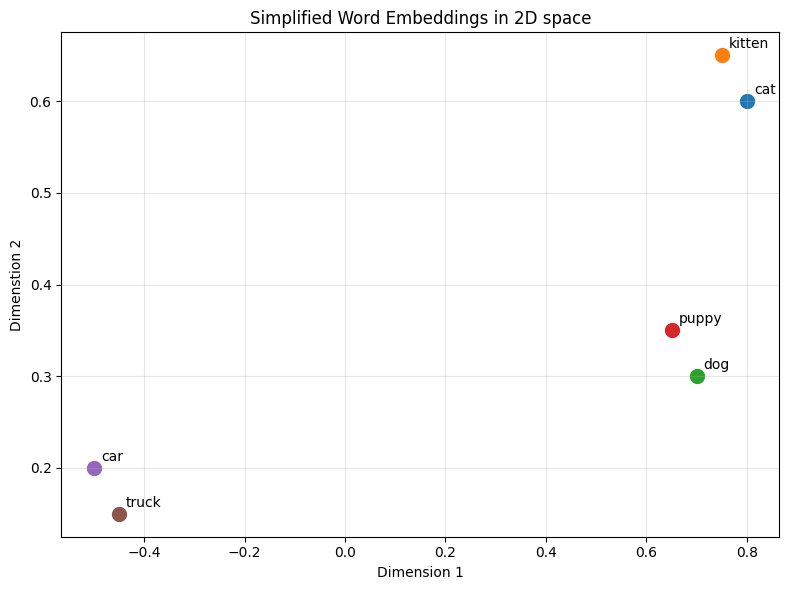

In [13]:
fig,ax = plt.subplots(figsize=(8,6))

for word,coords in word_embeddings.items():
    ax.scatter(coords[0],coords[1],s=100)
    ax.annotate(word,(coords[0],coords[1]),xytext=(5,5),textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimenstion 2')
ax.set_title('Simplified Word Embeddings in 2D space')
ax.grid(True,alpha=0.3)

plt.tight_layout()
plt.show()


###### Measuring Similarity

In [14]:
def cosine_similarity(vec1,vec2):
    dot_product = np.dot(vec1,vec2)
    norm_a = np.linalg.norm(vec1)
    norm_b = np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)

In [15]:
# Example 
cat_vector = [0.8,0.6,0.3]
kitten_vector = [0.75,0.65,0.35]
car_vector = [-0.5,0.2,0.1]

cat_kitten = cosine_similarity(cat_vector,kitten_vector)
print(cat_kitten)
cat_car = cosine_similarity(cat_vector,car_vector)
print(cat_car)
kitten_car = cosine_similarity(kitten_vector,car_vector)
print(kitten_car)

0.9966186334192181
-0.43718588548916804
-0.36432317655505975


##### Creating Our First Embeddings

In [16]:
from langchain_huggingface import HuggingFaceEmbeddings

# initialize a simple Embedding model(no api needed)
embeddings = HuggingFaceEmbeddings(
    model_name = 'sentence-transformers/all-MiniLM-L6-v2',
)
embeddings

HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [19]:
text = "Hello, I am learning about embedding"

embedding = embeddings.embed_query(text)
print(f'Text: {text}')
print(f'Embedding length: {len(embedding)}')
print(f'Embedding: {embedding}')

Text: Hello, I am learning about embedding
Embedding length: 384
Embedding: [-0.01254100538790226, -0.08428975939750671, -0.003735947422683239, -0.0036944919265806675, 0.029054438695311546, 0.061269812285900116, 0.012031087651848793, 0.017726916819810867, 0.04343551769852638, -0.02813183329999447, 0.020118694752454758, 0.07650148868560791, 0.04530566558241844, 0.0022559775970876217, -0.0579017736017704, 0.014729797840118408, 0.052186425775289536, 0.056562863290309906, -0.09237101674079895, -0.02778216265141964, -0.0287427119910717, -0.054919131100177765, 0.011186962015926838, -0.1067948043346405, 0.013341314159333706, -0.018864070996642113, -0.005179088097065687, 0.07339487969875336, 0.10817252099514008, -0.07271403074264526, 0.058050140738487244, -0.03648955374956131, -0.0010906789684668183, 0.0577571839094162, -0.07553375512361526, 0.11141452938318253, 0.025488946586847305, -0.01331321056932211, -0.07460536807775497, -0.010939502157270908, 0.019129646942019463, 0.014313717372715473, 

In [20]:
sentences = ['the cat sat on the mat',
             'A feline rested on the rug',
             'The dog played in the yard',
             'I love programming in python',
             'Python is my favorite programming language']

In [23]:
sentence_embeddings = embeddings.embed_documents(sentences)
print(f'Text: {text}')
print(sentence_embeddings)
print(sentence_embeddings[0])

Text: Hello, I am learning about embedding
[[0.1304018348455429, -0.01187011320143938, -0.028117049485445023, 0.05123867094516754, -0.055974461138248444, 0.030191563069820404, 0.030161285772919655, 0.024698371067643166, -0.01837056502699852, 0.05876680463552475, -0.024953192099928856, 0.06015428528189659, 0.03983177989721298, 0.03323053941130638, -0.06131136417388916, -0.04937311261892319, -0.05486350879073143, -0.040076084434986115, 0.05642914026975632, 0.03915658965706825, -0.034737084060907364, -0.013247653841972351, 0.031966209411621094, -0.06349924951791763, -0.06017860397696495, 0.07823449373245239, -0.028303874656558037, -0.047442831099033356, 0.0403592623770237, -0.006630904506891966, -0.06674093753099442, -0.004191364161670208, -0.02531166560947895, 0.05334165692329407, 0.017428133636713028, -0.09792361408472061, 0.006061306223273277, -0.06524167209863663, 0.045572612434625626, 0.023641804233193398, 0.0765848457813263, -0.010264366865158081, -0.004076801240444183, -0.062322810